# Restaurant_Reviews_Classification_with_NLTK 응용해보기 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("data/Restaurant_Reviews.tsv", delimiter='\t')

In [3]:
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [4]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
dataset.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [6]:
dataset.info() # dataframe 확인 하기 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


# Checking for null values

In [8]:
dataset.isnull().sum()

Review    0
Liked     0
dtype: int64

<AxesSubplot:xlabel='Liked', ylabel='count'>

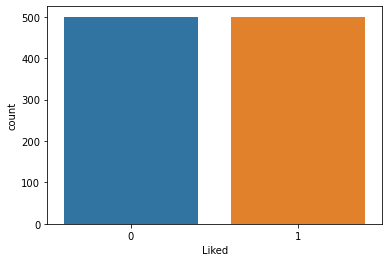

In [10]:
sns.countplot(x = dataset['Liked'],data= dataset)

In [11]:
dataset[dataset['Liked']==1]['Liked'].count()

500

In [12]:
dataset[dataset['Liked']==0]['Liked'].count()

500

In [13]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [14]:
import re

# Data Preprocessing

In [15]:
stemmer = SnowballStemmer('english')

In [16]:
corpus = []

In [17]:
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]',' ',dataset['Review'][i])
    review = review.lower()
    review = review.split()
    review = [stemmer.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    

In [18]:
corpus[1] # is , not 불용어 제거됨

'crust good'

In [19]:
len(corpus)

1000

In [20]:
corpus[999]

'wast enough life pour salt wound draw time took bring check'

# Creating Bag of Words Model

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
cv = CountVectorizer(max_features=1500)

In [23]:
x = cv.fit_transform(corpus).toarray()

In [24]:
x.shape

(1000, 1500)

In [25]:
y =dataset['Liked'].values

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=17)

# Naive Baye's Classifier(MultinomialNB)


In [28]:
from sklearn.naive_bayes import MultinomialNB

In [29]:
classifier = MultinomialNB()

# Training the classifier

In [30]:
classifier.fit(x_train,y_train)

MultinomialNB()

# making Predictions

In [31]:
y_pred = classifier.predict(x_test)

In [32]:
y_train_pred = classifier.predict(x_train)

# Evaluating the classifier

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        95
           1       0.78      0.75      0.77       105

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



In [ ]:
#https://www.kaggle.com/satheeshrsm/restaurant-review-classification/notebook